In [1]:

import pandas as pd
import seaborn as sns
import itertools


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, FunctionTransformer, Binarizer, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline 
from sklearn.pipeline import Pipeline as IMBPipeline

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler

import numpy as np
from scipy.stats import sem
from random import choice


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.datasets import fetch_openml


import missingno as msno


import matplotlib.pyplot as plt
import matplotlib as mpl


import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.datasets import make_classification
from sklearn.utils.class_weight import compute_class_weight

# --- Grid search
from sklearn.model_selection import GridSearchCV
# --- Randomized grid search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from scipy.stats import beta, loguniform
# --- Successive halving search
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.metrics import f1_score, roc_auc_score
from scipy.stats import beta, loguniform, uniform

import warnings

warnings.filterwarnings('ignore')
from sklearn.base import BaseEstimator, TransformerMixin

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold

# Import dataset

In [2]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

The aim of this analysis is to investigate a range of health-related factors and their interconnections to classify diabetes accurately. These factors include aspects such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. More precisely, this project tries to predict if an individual will develop or not diabates, according to those factors.

# Preprocessing

## Description of the columns

gender: Gender refers to the classification of individuals as male or female. It is an important demographic factor that can influence various aspects of health and medical conditions.

age: Age represents the number of years a person has lived since birth. It provides insight into the individual's life stage, potential health risks, and susceptibility to certain diseases or conditions associated with specific age groups.

hypertension: Hypertension, often referred to as high blood pressure, is a medical condition characterized by persistently elevated blood pressure in the arteries. It is a significant risk factor for various cardiovascular diseases and can lead to serious health complications if left unmanaged.

heart_disease: Heart disease refers to a range of conditions affecting the heart, such as coronary artery disease, heart failure, or heart rhythm disorders. It is a broad term encompassing various cardiovascular disorders that can impact the overall functioning of the heart.

smoking_history: Smoking history indicates whether an individual has a past or present habit of smoking tobacco products. Smoking is a well-known risk factor for numerous health problems, including respiratory diseases, cardiovascular diseases, and certain types of cancer.

bmi: Body Mass Index (BMI) is a measure of body fat based on an individual's weight and height. It provides an estimation of whether a person's weight is within a healthy range or if they are underweight, overweight, or obese. BMI is commonly used as a screening tool for assessing the risk of weight-related health issues.

HbA1c_level: HbA1c (Hemoglobin A1c) level is a laboratory test that measures the average blood sugar (glucose) levels over the past 2-3 months. It is commonly used in the diagnosis and management of diabetes. Higher HbA1c levels indicate poorer blood sugar control and may indicate the need for adjustments in diabetes treatment.

blood_glucose_level: Blood glucose level refers to the concentration of glucose (sugar) in the bloodstream. It is an important indicator of an individual's blood sugar regulation. Abnormal blood glucose levels, either too high (hyperglycemia) or too low (hypoglycemia), can be associated with various health conditions, particularly diabetes.

diabetes: Diabetes is a chronic medical condition characterized by elevated blood sugar levels due to insufficient insulin production or ineffective use of insulin in the body. It requires careful management and monitoring of blood sugar levels to prevent complications. Diabetes can have significant impacts on overall health and may require lifestyle modifications, medication, and regular medical care.

In [3]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


After this analysis, I can notice that two columns contain object type data, which are difficult to handle during the project. Hence, I decided to write a script in Python through which the object type values are transformed into int64.

### Check object type

In [6]:
#Remove leading and trailing whitespaces and get unique values in the specified column
unique_values = data['smoking_history'].str.strip().dropna().unique()

# Convert the unique values to a list
unique_values_list = list(unique_values)

# Print the list of unique values
print(unique_values_list)

['never', 'No Info', 'current', 'former', 'ever', 'not current']


In [7]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Create a new column 'smoking_category' and apply the function to populate it
data['smoking_category'] = data['smoking_history'].apply(recategorize_smoking)

# Substitute the recategorized values in the original column
data['smoking_history'] = data['smoking_category']

# Drop the 'smoking_category' column if you no longer need it
data = data.drop(columns=['smoking_category'])

# Check the updated 'smoking_history' column
print(data['smoking_history'].value_counts())

non-smoker     70911
past_smoker    19803
current         9286
Name: smoking_history, dtype: int64


In [8]:
data = data.copy()

Now I used One Hot Encoder to transform all categorical data into numerical values.

In [9]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

In [10]:
print(data.columns)

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
       'gender_Other', 'smoking_history_current', 'smoking_history_non-smoker',
       'smoking_history_past_smoker'],
      dtype='object')


### Analysis of target distribution

As the name of the dataset, i can understand that the target column is the "diabetes" column, so i analize it to check if the dataset is balanced or imbalanced.

In [11]:
target_column = 'diabetes'
class_distribution = data[target_column].value_counts()
print(class_distribution)

0    91500
1     8500
Name: diabetes, dtype: int64


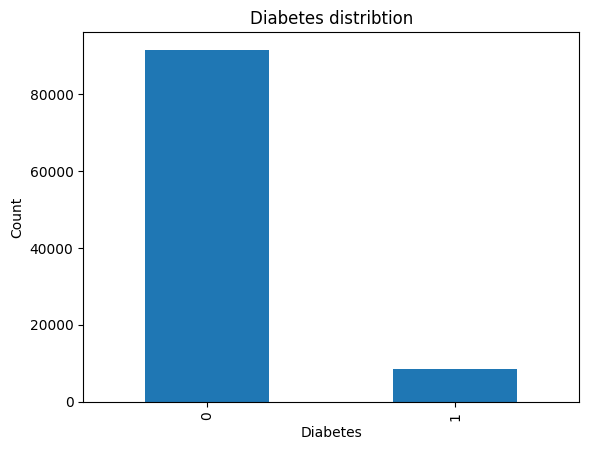

In [12]:
class_distribution.plot(kind='bar')
plt.title('Diabetes distribtion')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

From the graph above i can see that among the 100000 individuals who were analyzed only 8500 have contracted diabetes

### Missing values analysis

I need to check if in the dataset i have some missing values in order to deal with it

In [13]:
data.isnull().sum(axis=0)


age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
gender_Female                  0
gender_Male                    0
gender_Other                   0
smoking_history_current        0
smoking_history_non-smoker     0
smoking_history_past_smoker    0
dtype: int64

<AxesSubplot: >

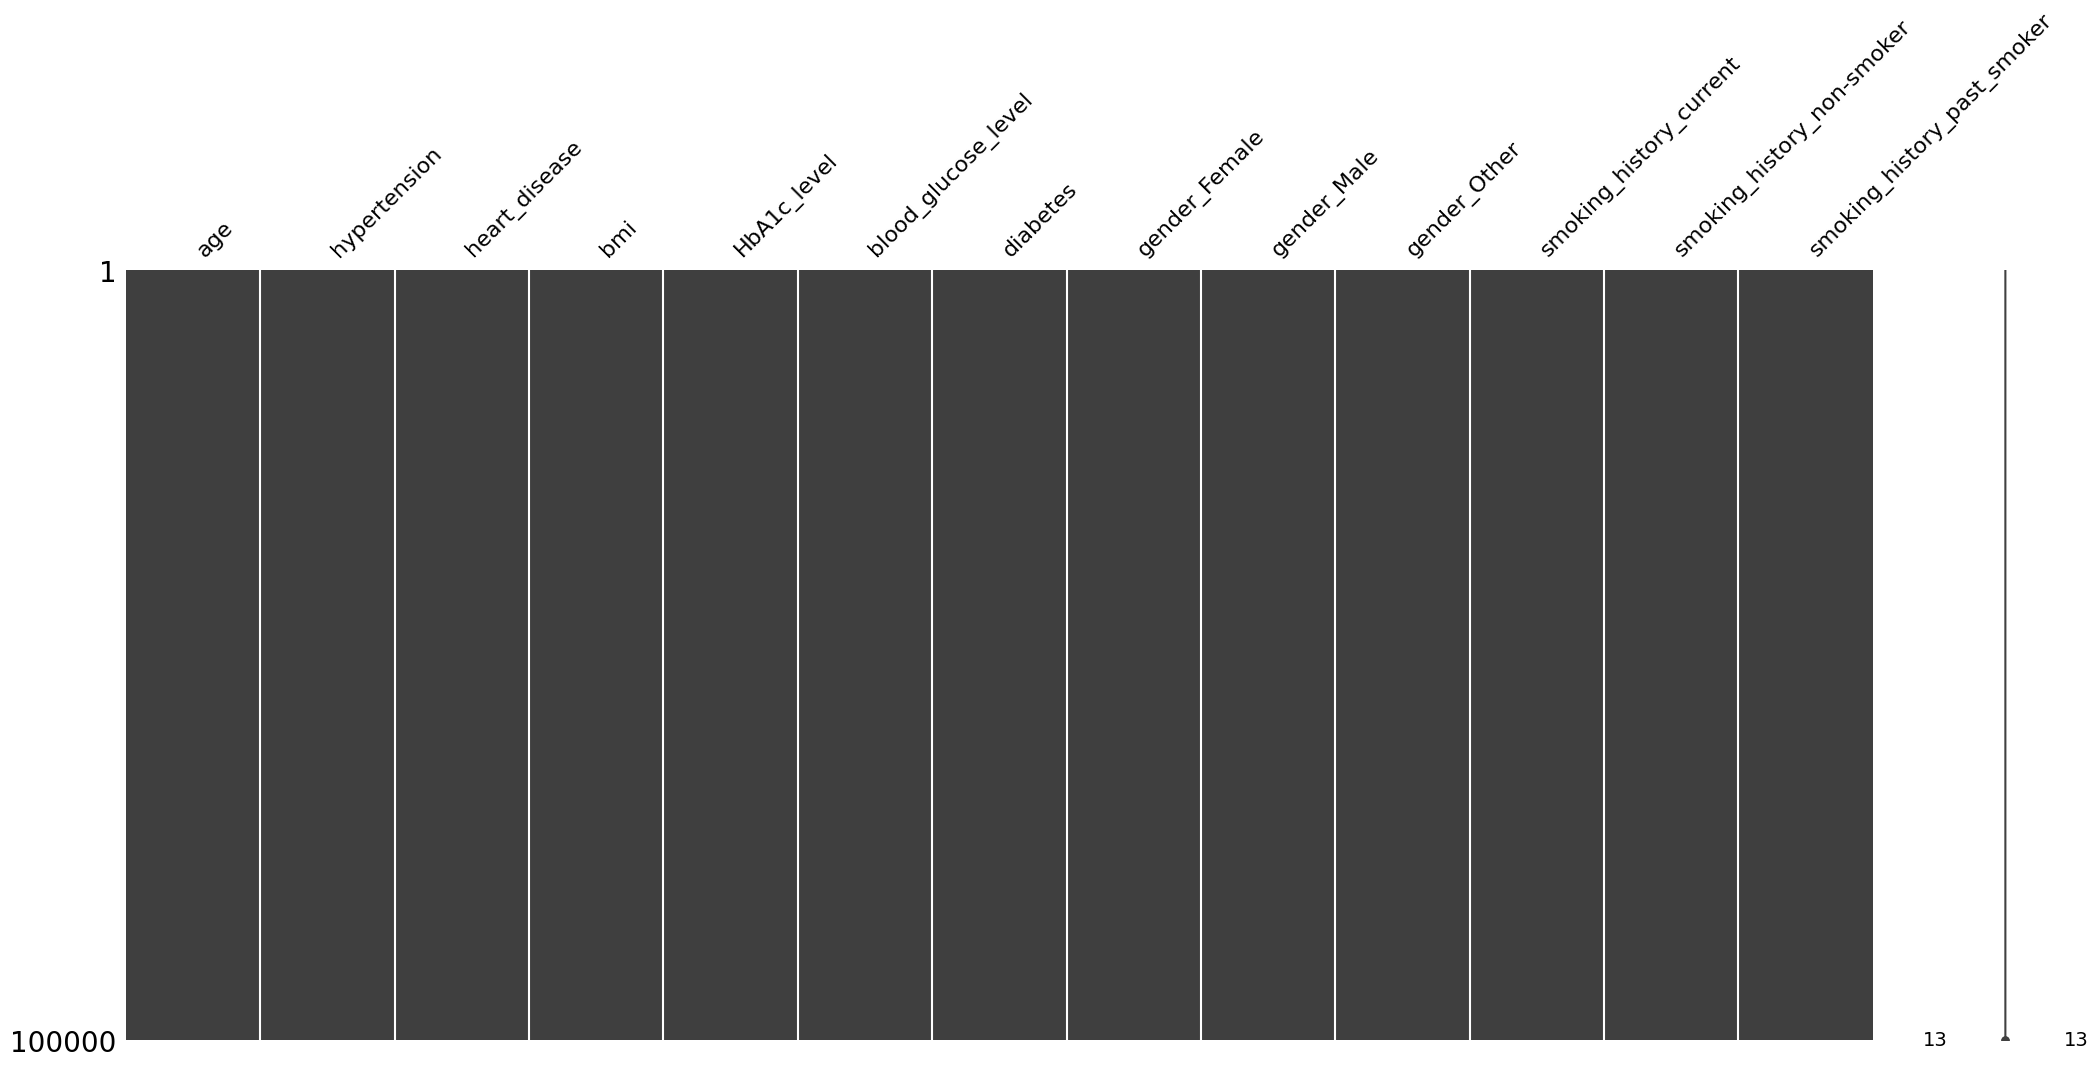

In [14]:
msno.matrix(data)

As we can see there are no missing values in the dataset, so now i can check the correlation between each column and the target column and see how much they are correlated so i can, at random, remove some values from some columns in order to "create" missing values.

In [15]:
# Gender & Diabetes
data[["gender_Female","diabetes"]].groupby(["gender_Female"], as_index = False).mean().sort_values(by="gender_Female",ascending = False)

,gender_Female,diabetes
1,1,0.076189
0,0,0.097447


In [16]:
data[["gender_Male","diabetes"]].groupby(["gender_Male"], as_index = False).mean().sort_values(by="gender_Male",ascending = False)

,gender_Male,diabetes
1,1,0.097490
0,0,0.076165


In [17]:
# Age & Diabetes
data[["age","diabetes"]].groupby(["age"], as_index = False).mean().sort_values(by="age",ascending = False)

,age,diabetes
101,80.00,0.182174
100,79.00,0.227053
99,78.00,0.199413
98,77.00,0.186301
97,76.00,0.203274
...,...,...
4,0.40,0.000000
3,0.32,0.000000
2,0.24,0.000000
1,0.16,0.000000


In [18]:
# Hypertension & Diabetes 
data[["hypertension","diabetes"]].groupby(["hypertension"], as_index = False).mean().sort_values(by="hypertension",ascending = False)

,hypertension,diabetes
1,1,0.278958
0,0,0.069308


In [19]:
# Heart Disease & Diabetes 
data[["heart_disease","diabetes"]].groupby(["heart_disease"], as_index = False).mean().sort_values(by="heart_disease",ascending = False)

,heart_disease,diabetes
1,1,0.321410
0,0,0.075298


In [20]:
# Smoking History & Diabetes
data[["smoking_history_current","diabetes"]].groupby(["smoking_history_current"], as_index = False).mean().sort_values(by="smoking_history_current",ascending = False)

,smoking_history_current,diabetes
1,1,0.102089
0,0,0.083251


In [21]:
data[["smoking_history_non-smoker","diabetes"]].groupby(["smoking_history_non-smoker"], as_index = False).mean().sort_values(by="smoking_history_non-smoker",ascending = False)

,smoking_history_non-smoker,diabetes
1,1,0.067690
0,0,0.127196


In [22]:
data[["smoking_history_past_smoker","diabetes"]].groupby(["smoking_history_past_smoker"], as_index = False).mean().sort_values(by="smoking_history_past_smoker",ascending = False)

,smoking_history_past_smoker,diabetes
1,1,0.138969
0,0,0.071674


In [23]:
# Bmi & Diabetes
data[["bmi","diabetes"]].groupby(["bmi"], as_index = False).mean().sort_values(by="bmi",ascending = False)

,bmi,diabetes
4246,95.69,0.0
4245,95.22,0.0
4244,91.82,0.0
4243,88.76,0.0
4242,88.72,1.0
...,...,...
4,10.21,0.0
3,10.19,0.0
2,10.14,0.0
1,10.08,0.0


In [24]:
# HbA1c level & Diabetes
data[["HbA1c_level","diabetes"]].groupby(["HbA1c_level"], as_index = False).mean().sort_values(by="HbA1c_level",ascending = False)

,HbA1c_level,diabetes
17,9.0,1.000000
16,8.8,1.000000
15,8.2,1.000000
14,7.5,1.000000
13,7.0,1.000000
12,6.8,1.000000
11,6.6,0.079977
10,6.5,0.073308
9,6.2,0.078365
8,6.1,0.080890


In [25]:
# Blood glucose level & Diabetes
data[["blood_glucose_level","diabetes"]].groupby(["blood_glucose_level"], as_index = False).mean().sort_values(by="blood_glucose_level",ascending = False)

,blood_glucose_level,diabetes
17,300,1.000000
16,280,1.000000
15,260,1.000000
14,240,1.000000
13,220,1.000000
12,200,0.085132
11,160,0.090249
10,159,0.085836
9,158,0.000000
8,155,0.079076


After this analysis,  I decided to introduce some missing values in colums 'bmi' and 'smoking_history_non-smoker' because they are the less related to the diabetes column. In fact, I wanted to add more complexity with missing values, but at the same time I didn't want to introduce too much bias in the analysis.

In [26]:
# columns on which you want to introduce missing values
columns_to_modify = ['bmi', 'smoking_history_non-smoker']

# probability of introducing missing value
probability = {'bmi': 0.3, 'smoking_history_non-smoker':0.2}

# introduce missing values
for column in columns_to_modify:
    data[column] = data[column].apply(lambda x: np.nan if np.random.rand() < probability[column] else x)


<AxesSubplot: >

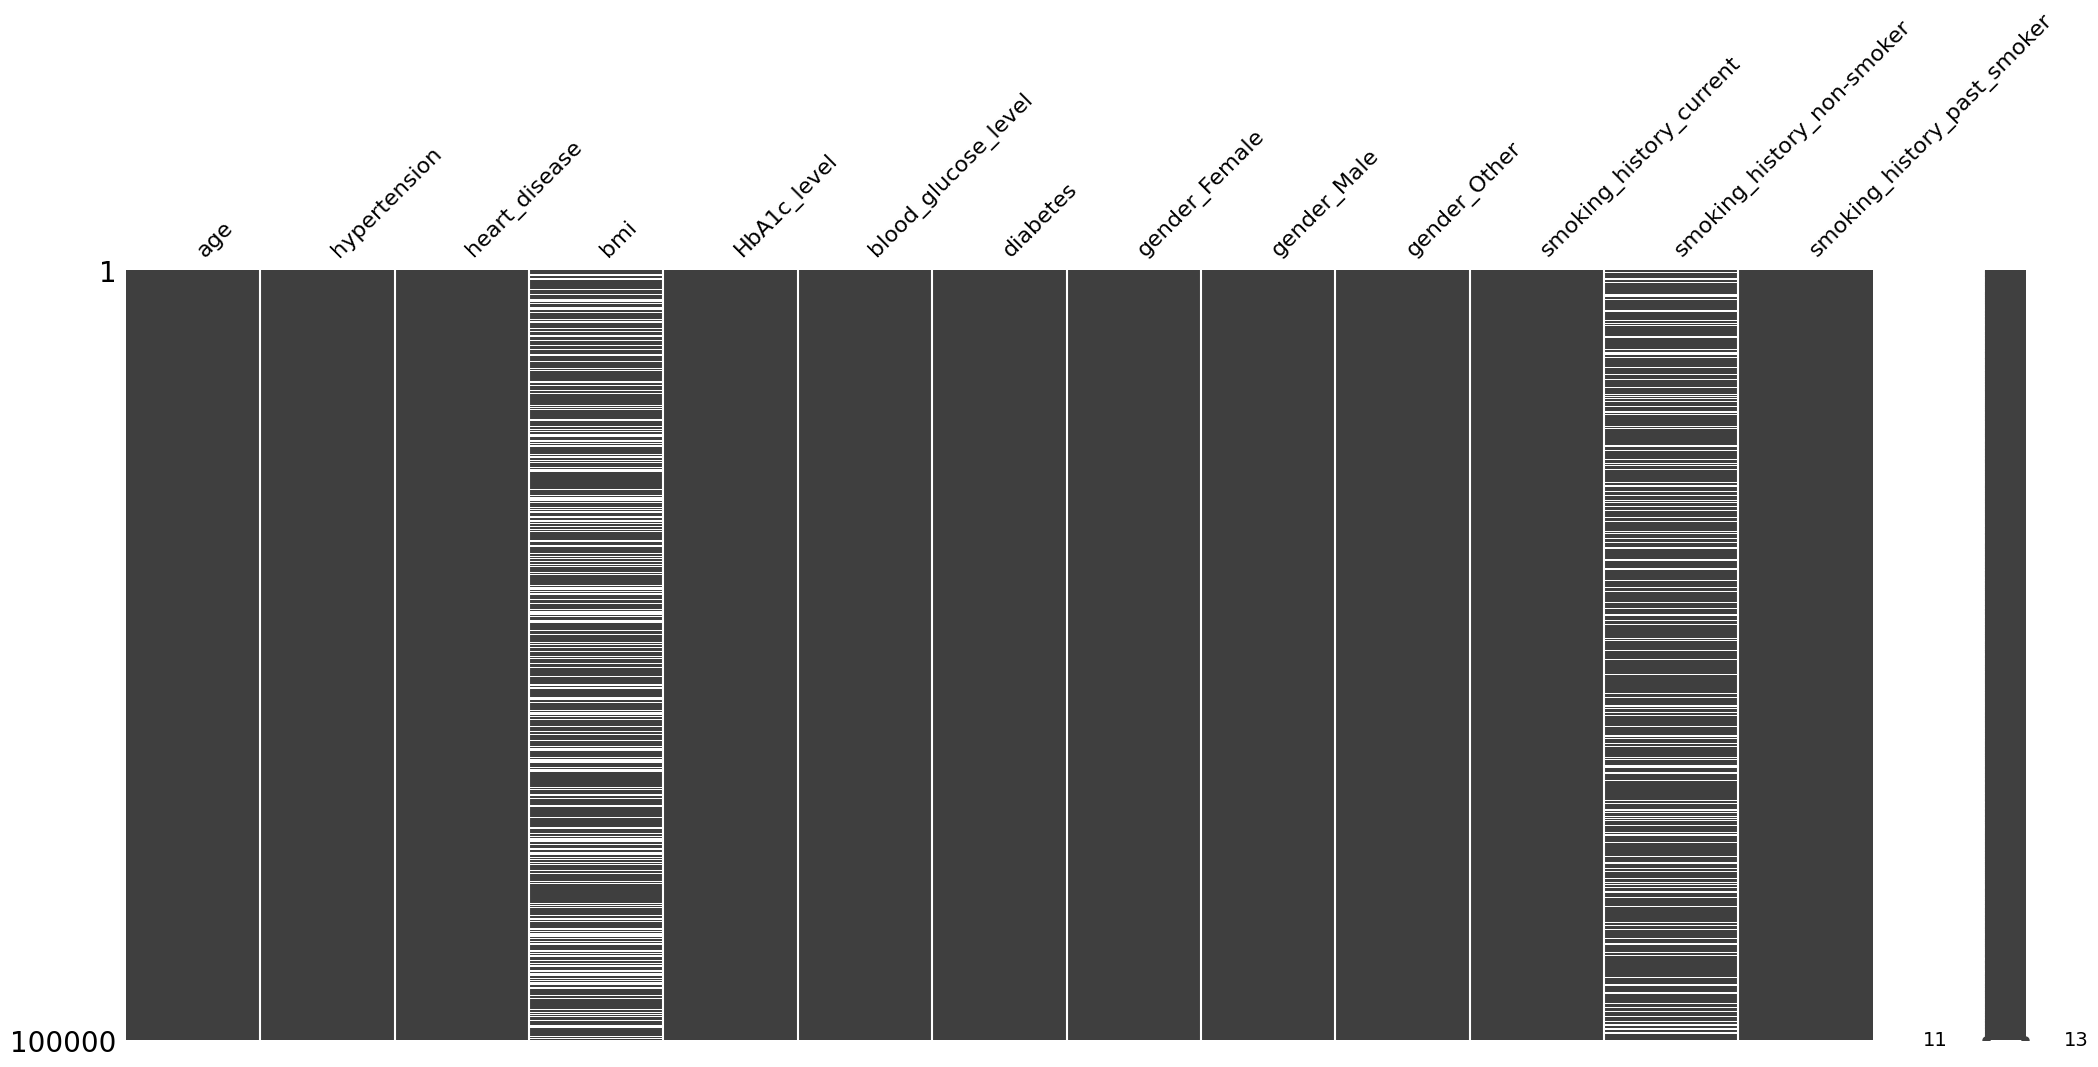

In [27]:
msno.matrix(data)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          70161 non-null   float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Female                100000 non-null  uint8  
 8   gender_Male                  100000 non-null  uint8  
 9   gender_Other                 100000 non-null  uint8  
 10  smoking_history_current      100000 non-null  uint8  
 11  smoking_history_non-smoker   80060 non-null   float64
 12  smoking_history_past_smoker  100000 non-null  uint8  
dtype

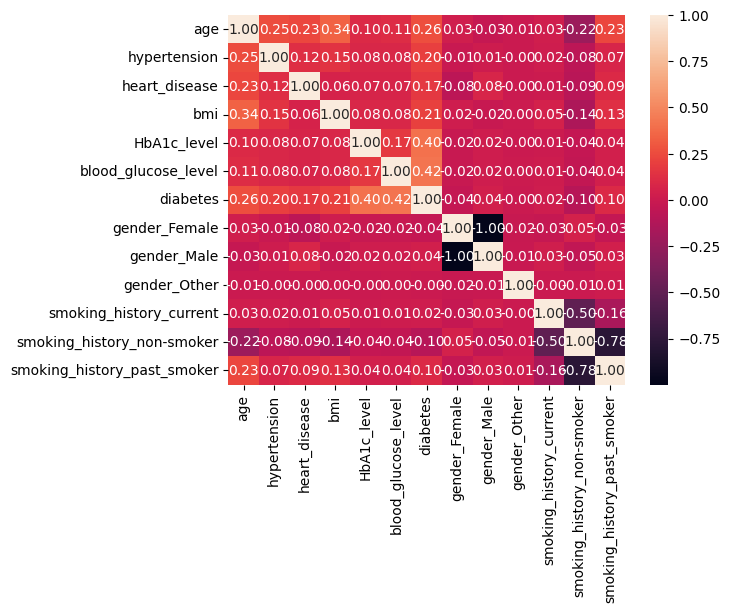

In [29]:
sns.heatmap(data.corr(), annot = True, fmt = ".2f")
plt.show()

### Train and test splitting

In [30]:
# Split dataFrame into X and y
X = data.drop(['diabetes'], axis=1)
y = data['diabetes']
    
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=30, shuffle=True)

# Model construction

In [31]:
pipeline_other = IMBPipeline([
    ('scaler', StandardScaler() )
])

pipeline_bmi = IMBPipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler() )
])

pipeline_smoking_history = IMBPipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler() )
])

final_transformation = ColumnTransformer(transformers=[
    ('other', pipeline_other ,['age','blood_glucose_level'] ),
    ('smoking_history_non-smoker', pipeline_smoking_history ,['smoking_history_non-smoker'] ),
    ('bmi', pipeline_bmi ,['bmi'] ),
],
remainder='drop',
verbose_feature_names_out=False,
sparse_threshold=0
)

### Model selection

With the following script I analyze the performance of a 'list' of different classifiers: the one obtaining the highest percentage of success, is the one that I will use in the final model.

In [32]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

In [33]:
for name, model in models.items():
    model_pipeline = IMBPipeline([
        ('trans', final_transformation),
        ('smote',SMOTE()),
        ('dim_reduction', PCA(n_components=0.8)),
        ('classifier', model)
    ])
    model_pipeline.fit(X_train, y_train)
    score = model_pipeline.score(X_test, y_test)
    print(name + ": {:.2f}%".format(score * 100))

Logistic Regression: 79.62%
K-Nearest Neighbors: 86.47%
Decision Tree: 85.56%
Random Forest: 86.48%
Gradient Boosting Classifier: 77.22%


The KNN classifier results to be the best.

In [34]:
final_pipeline =  IMBPipeline([
        ('trans', final_transformation),
        ('smote',SMOTE()),
        ('dim_reduction', PCA(n_components=0.8)),
        ('classifier', KNeighborsClassifier())
])
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('other',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'blood_glucose_level']),
                                                 ('smoking_history_non-smoker',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['smoking_history_non-smoker']),
                                                 ('bmi',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bmi'])],
                                   verbose_feature_names_out=False)),
                ('smote', SMOTE()), ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', KNeighborsClassifier())])

This is the final pipeline representation, which contains:

SMOTE(Synthetic Minority Over-sampling Technique): an oversampling technique used to balance class distribution in imbalanced datasets. It generates synthetic samples for the minority class to reduce class imbalance.

PCA (Principal Component Analysis): a technique used for dimensionality reduction. In this case, it's configured to retain enough components to explain 80% of the variance in the data.

KNeighborsClassifier: a machine learning model used for classification based on the k-Nearest Neighbors algorithm. It makes predictions by finding the k training samples closest to a given test sample and returning the most common class among them.

'final_pipeline.fit(X_train, y_train)': applies all the transformations specified in the pipeline on the training data (X_train), oversampling using SMOTE, reducing dimensions using PCA, and then training the k-Nearest Neighbors classifier.

In [35]:
final_pipeline.predict(X_test)

array([0, 1, 0, ..., 1, 0, 0])

In [36]:
print(f"KNN Score: {round(final_pipeline.score(X_test, y_test), 2)}")
pred_KNN = final_pipeline.predict(X_test)

KNN Score: 0.86


The above code evaluates the performance of the KNN model on the test datasets X_test and y_test

In [37]:
scores = cross_val_score(final_pipeline, X_train, y_train, cv = 8, n_jobs = 2, scoring = "f1")

In [38]:
print(f"CV scores for KNN model:\n{scores}")
print(f"CV Mean score: {round(scores.mean(), 2)}")

CV scores for KNN model:
[0.43788949 0.4335772  0.44729459 0.43945469 0.41347754 0.42846498
 0.43504762 0.431562  ]
CV Mean score: 0.43


In [39]:
parameters = {
    'classifier__n_neighbors': [5, 10, 20, 50, 100, 200],  # Example values for n_neighbors
    'classifier__weights': ['uniform', 'distance'],  # Example values for weights
    'classifier__p': [1, 2]  # Example values for p
}

The dictionary named 'parameters' contains different hyperparameter values for the K-Nearest Neighbors classifier.

In [40]:
rs = RandomizedSearchCV(estimator=final_pipeline,
                        param_distributions=parameters,
                        scoring='f1',
                        refit=True,
                        n_iter=10,
                        cv=2,
                        random_state=1,
                        n_jobs=-1,
                        verbose=1)
rs = rs.fit(X_train, y_train)
print(f'Best score got by the best estimator: {rs.best_score_}')
print(f'Configuration for the best estimator/classifier: {rs.best_params_}')


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best score got by the best estimator: 0.4527355016905925
Configuration for the best estimator/classifier: {'classifier__weights': 'distance', 'classifier__p': 2, 'classifier__n_neighbors': 5}


In [41]:
f1_score(y_test, rs.best_estimator_.predict(X_test))

0.45078275788119243

In [42]:
# Getting score on the Test set
pred_KNN = final_pipeline.predict(X_test)
accuracy = f1_score(y_test, pred_KNN)
print(f" Testing Score of the model is {accuracy}")

 Testing Score of the model is 0.4486094316807739


this code calculates and prints the F1-score, which takes into account both precision and recall.

### Confusion matrix

The confusion matrix is a table that is used to evaluate the performance of a classification model on a set of data for which the true values are known. It provides a detailed breakdown of the model's predictions and the actual outcomes.

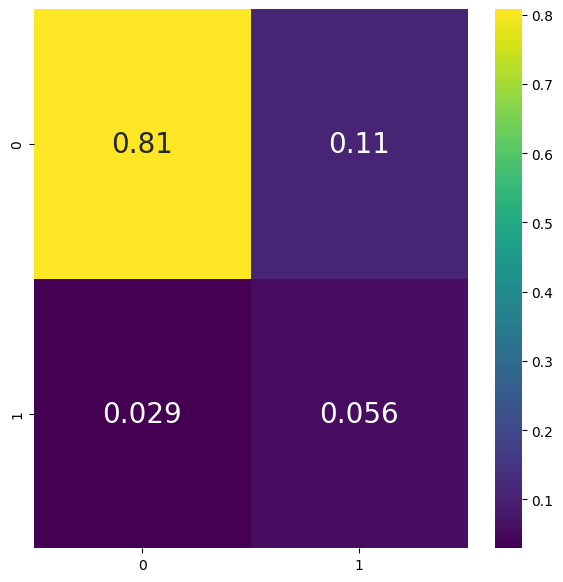

In [43]:
# Getting the Confusion matrix
plt.subplots(figsize=(7,7))
cf_matrix = confusion_matrix(y_test, pred_KNN)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='viridis',annot = True, annot_kws = {'size':20})
plt.show()

In [44]:
KNNcl = rs.best_estimator_

In [45]:
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
train_sizes, train_scores, test_scores = learning_curve(KNNcl,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 2,
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

This code performs the learning curve analysis, It helps to visualize how the performance of the model changes with respect to the size of the training set.

(0.2, 1.03)

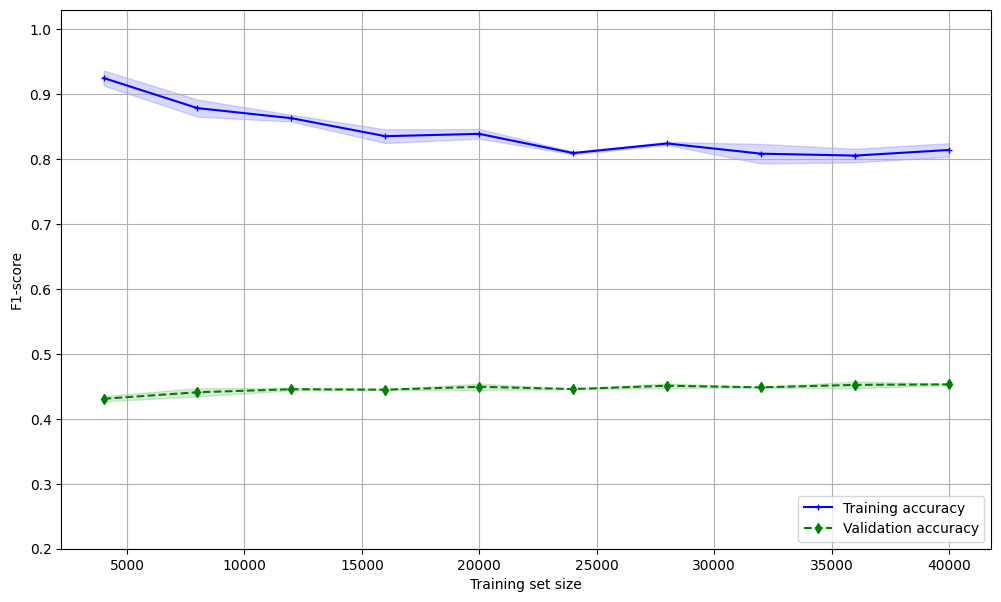

In [46]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.2, 1.03])

In [47]:
# Define the range of hyperparameters to explore
range_n_neighbors = [20, 50, 70]
range_weights = ['uniform', 'distance']
range_p = [1, 2]

# Perform validation curves for n_neighbors, weights, and p
param_name = 'classifier__n_neighbors'
train_scores_n_neighbors, test_scores_n_neighbors = validation_curve(
    final_pipeline, X=X_train, y=y_train, 
    param_name=param_name, param_range=range_n_neighbors, 
    cv=5, n_jobs=-1, scoring='f1'
)

(20, 100)

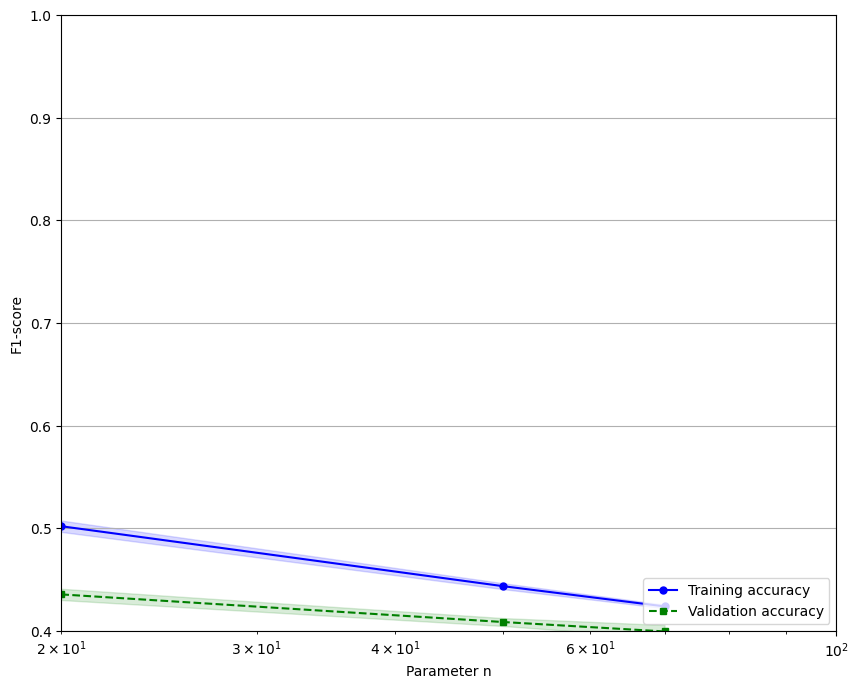

In [48]:
train_mean = np.mean(train_scores_n_neighbors, axis=1)
train_std = np.std(train_scores_n_neighbors, axis=1)
test_mean = np.mean(test_scores_n_neighbors, axis=1)
test_std = np.std(test_scores_n_neighbors, axis=1)

fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot()
ax.plot(range_n_neighbors, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_n_neighbors,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_n_neighbors, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_n_neighbors,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parameter n')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.4, 1])
ax.set_xscale('log')
ax.set_xlim([20,100])

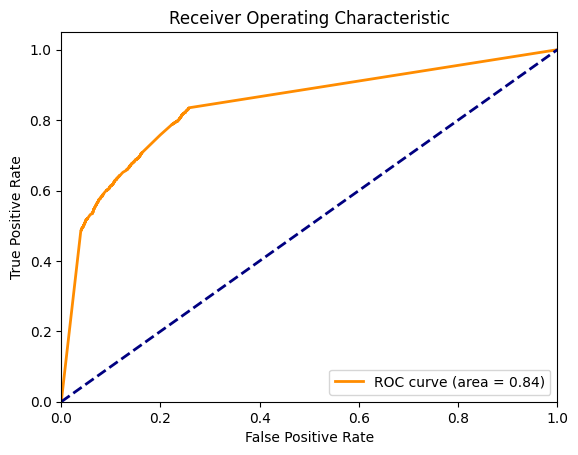

In [49]:
from sklearn.metrics import roc_curve, auc

# Assuming 'clf' is your classifier and X_test is your test data
y_scores = KNNcl.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Now you can plot the ROC curve and print the AUC score
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2202d5d0-cd08-4b45-a3f6-81c429b0bf3d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>